# Feature selection techniques

As a data scientist or machine learning enthusiast, you know that building an accurate and efficient machine learning model is no small feat. By selecting the most relevant and informative features from your dataset, you can significantly improve the accuracy and efficiency of your model. That's where feature selection comes in. It's one of the several ways to improve your machine learning models, in addition to feature engineering, hyperparameter tuning, regularisation and data preprocessing.


**Feature selection** is the process of selecting the most relevant and informative features from your dataset. As the old saying goes, "garbage in, garbage out" - if your dataset contains irrelevant or noisy features, your model's performance will suffer, no matter how good your algorithm or hyperparameters are.

**This notebook covers:**
1. Filter methods
2. Wrapper methods
3. Embedded methods

These are applied to the breast cancer dataset, where we predict a positive for breast cancer.

## Imports

In [7]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing and modelling
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE

pd.set_option('display.max_columns', None)

### Read data and pre-process (Breast Cancer Dataset)

In [8]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Create a dataframe with the data and column names
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the dataframe
df['target'] = data.target

# Prepare input features and target
X = df.drop(columns=['target'])
y = df['target']

# Scale the dataset
scaler = scaler = MinMaxScaler()
scaler.fit(X)  
X_scaled = pd.DataFrame(scaler.transform(X), columns=data.feature_names)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,0.319892,0.277308,0.306337,0.187275,0.242033,0.136127,0.067502,0.066054,0.208586,0.122999,0.050154,0.087783,0.038449,0.027396,0.038243,0.102653,0.044949,0.110400,0.076096,0.037353,0.263607,0.278252,0.232980,0.132889,0.171300,0.150488,0.124920,0.206838,0.154741,0.099042
124,0.302381,0.225905,0.292378,0.173913,0.167193,0.165235,0.189597,0.139165,0.182828,0.174179,0.018975,0.172339,0.021957,0.014677,0.142979,0.228678,0.125177,0.196628,0.059070,0.109904,0.225187,0.285981,0.207082,0.109836,0.206894,0.219082,0.264217,0.308522,0.095210,0.139315
421,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.507582,0.157414,0.254332,0.190265,0.079657,0.280892,0.376934,0.133283,0.299299,0.262397,0.157166,0.303451,0.168443,0.317197,0.153362,0.396421,0.326193,0.257109,0.380756,0.248768,0.242949
195,0.280610,0.223876,0.267708,0.158176,0.241762,0.105147,0.090745,0.118141,0.388384,0.141323,0.029947,0.121199,0.034679,0.016713,0.121868,0.102277,0.058611,0.159500,0.149828,0.043434,0.211668,0.265991,0.201205,0.102094,0.254441,0.119636,0.140895,0.282990,0.287601,0.094779
545,0.314213,0.457220,0.299910,0.182269,0.359574,0.147506,0.069681,0.121421,0.305051,0.169545,0.084918,0.215656,0.061678,0.045645,0.141245,0.140731,0.051035,0.171699,0.182755,0.058324,0.263963,0.454957,0.234922,0.133848,0.333025,0.120703,0.083786,0.246529,0.212300,0.095041


### 

# Fit base model

## Decision Tree

In [9]:
def fit_model(X_train, y_train, X_test, y_test):
    """
    Fits a Decision Tree Classifier on the training data and evaluates it on the test data using accuracy, precision,
    recall, and F1-score.
    """
    
    # Instantiate a model
    model = DecisionTreeClassifier(random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Compute the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the performance metrics
    print('Precision:', round(precision, 3), 'Recall:', round(recall, 3), 'F1-score:', round(f1, 3))
    return model

In [10]:
# reg = fit_logistic_reg(X_train, y_train, X_test, y_test)
reg = fit_model(X_train, y_train, X_test, y_test)

Precision: 0.971 Recall: 0.935 F1-score: 0.953


## Define function to plot feature importances
We will use this in the below techniques

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_importances(df_in, title):
  """make a horizontal bar chart of feature importances"""

  # Plot the feature importances in sorted order
  # Set plot style
  plt.style.use('seaborn-darkgrid')

  # Create horizontal bar plot
  sns.set_style('whitegrid')
  cmap = sns.color_palette('rocket_r', as_cmap=True)
  fig, ax = plt.subplots(figsize=(7, 9))
  sns.barplot(x='Importance', y='Feature', data=df_in, orient='h')
  ax.set_title(title, fontsize=16)
  ax.set_xlabel('Importance Scores', fontsize=12)
  ax.set_ylabel('Features', fontsize=12)
  ax.tick_params(axis='both', which='major', labelsize=12)
  ax.invert_yaxis()
  plt.show()
  

# 1. Filter methods

In [12]:
n_features = 25

## Pearson correlation

Pearson correlation feature selection measures the linear relationship between features and the target variable. This technique is useful for identifying important features in regression problems where the target variable is continuous. The correlation coefficient is used to measure the strength and direction of the linear relationship. However, Pearson correlation assumes a linear relationship and may miss non-linear relationships or complex interactions between features.

**Pros:**
- Measures the linear relationship between features and the target variable
- Can identify both positive and negative correlations
- Relatively easy to interpret and explain

**Cons:**
- Assumes a linear relationship between features and the target variable
- May miss non-linear relationships between features and the target variable
- Does not capture complex interactions between features

Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'perimeter error', 'area error', 'compactness error', 'concavity error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


C:\Users\hjurz\AppData\Local\Temp\ipykernel_26360\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


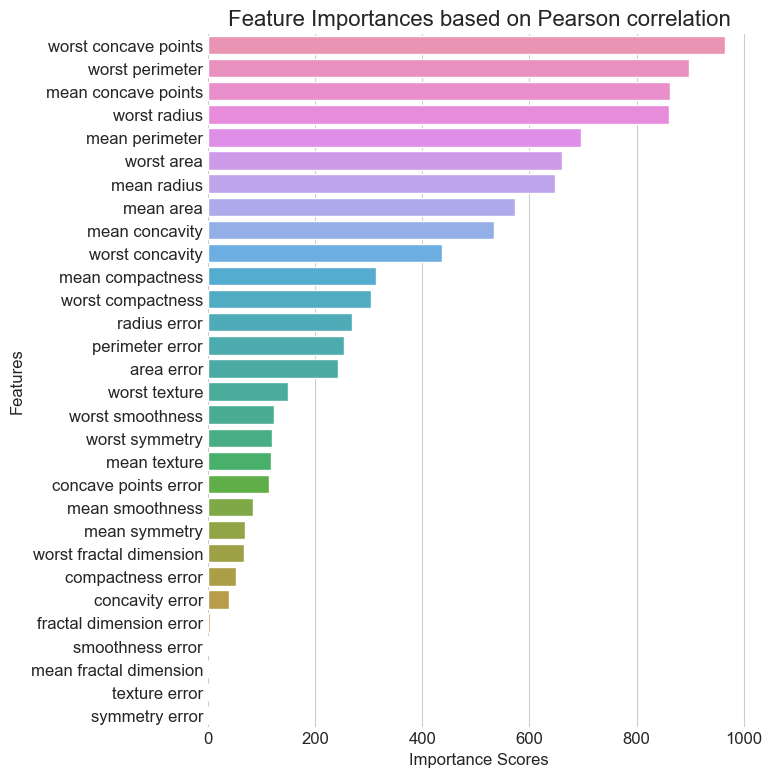

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,perimeter error,area error,compactness error,concavity error,concave points error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,0.319892,0.277308,0.306337,0.187275,0.242033,0.136127,0.067502,0.066054,0.208586,0.050154,0.038449,0.027396,0.102653,0.044949,0.110400,0.263607,0.278252,0.232980,0.132889,0.171300,0.150488,0.124920,0.206838,0.154741,0.099042
124,0.302381,0.225905,0.292378,0.173913,0.167193,0.165235,0.189597,0.139165,0.182828,0.018975,0.021957,0.014677,0.228678,0.125177,0.196628,0.225187,0.285981,0.207082,0.109836,0.206894,0.219082,0.264217,0.308522,0.095210,0.139315
421,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.157414,0.190265,0.079657,0.376934,0.133283,0.299299,0.303451,0.168443,0.317197,0.153362,0.396421,0.326193,0.257109,0.380756,0.248768,0.242949
195,0.280610,0.223876,0.267708,0.158176,0.241762,0.105147,0.090745,0.118141,0.388384,0.029947,0.034679,0.016713,0.102277,0.058611,0.159500,0.211668,0.265991,0.201205,0.102094,0.254441,0.119636,0.140895,0.282990,0.287601,0.094779
545,0.314213,0.457220,0.299910,0.182269,0.359574,0.147506,0.069681,0.121421,0.305051,0.084918,0.061678,0.045645,0.140731,0.051035,0.171699,0.263963,0.454957,0.234922,0.133848,0.333025,0.120703,0.083786,0.246529,0.212300,0.095041


In [13]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply Pearson correlation feature selection to select the top two features
selector = SelectKBest(f_regression, k=n_features)
X_filter = selector.fit_transform(X, y)

# Get the indices of the selected features
mask = selector.get_support()

# Make dataframe with new features
X_train_corr = X_train.loc[:,mask]
X_test_corr = X_test.loc[:,mask]
new_features = X_train.loc[:,mask].columns.tolist()

# Get the feature importances and plot
scores = selector.scores_
feature_importances = {feature_name: score for feature_name, score in zip(X_train.columns, scores)}
feature_importances = pd.DataFrame(feature_importances.items(), columns=['Feature', 'Importance'])\
    .sort_values('Importance', ascending=True)
print("Selected features:", new_features)
plot_importances(feature_importances, 'Feature Importances based on Pearson correlation')

X_train_corr.head()


## Chi-squared

C:\Users\hjurz\AppData\Local\Temp\ipykernel_26360\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


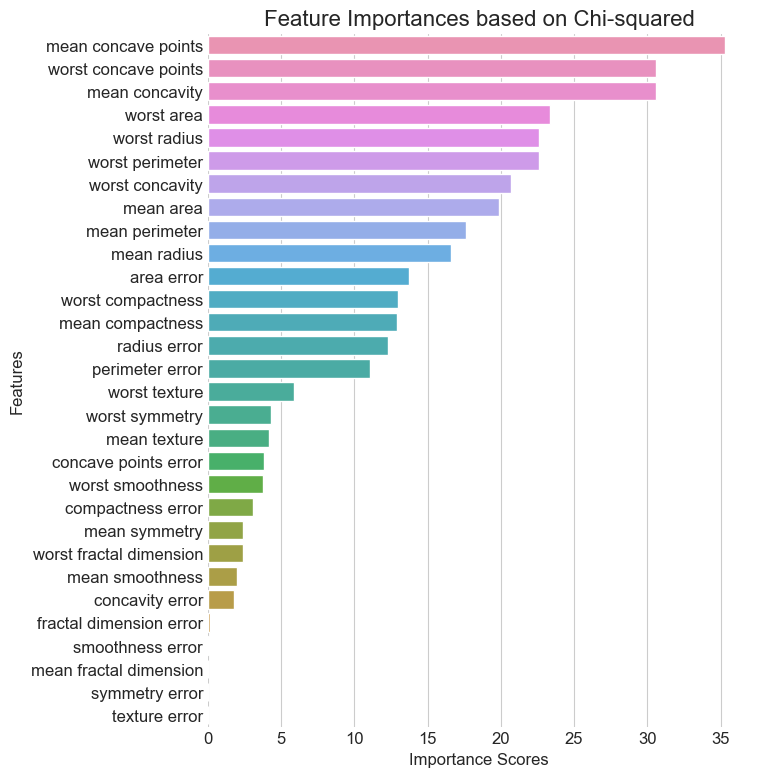

Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'perimeter error', 'area error', 'compactness error', 'concavity error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,perimeter error,area error,compactness error,concavity error,concave points error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,0.319892,0.277308,0.306337,0.187275,0.242033,0.136127,0.067502,0.066054,0.208586,0.050154,0.038449,0.027396,0.102653,0.044949,0.110400,0.263607,0.278252,0.232980,0.132889,0.171300,0.150488,0.124920,0.206838,0.154741,0.099042
124,0.302381,0.225905,0.292378,0.173913,0.167193,0.165235,0.189597,0.139165,0.182828,0.018975,0.021957,0.014677,0.228678,0.125177,0.196628,0.225187,0.285981,0.207082,0.109836,0.206894,0.219082,0.264217,0.308522,0.095210,0.139315
421,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.157414,0.190265,0.079657,0.376934,0.133283,0.299299,0.303451,0.168443,0.317197,0.153362,0.396421,0.326193,0.257109,0.380756,0.248768,0.242949
195,0.280610,0.223876,0.267708,0.158176,0.241762,0.105147,0.090745,0.118141,0.388384,0.029947,0.034679,0.016713,0.102277,0.058611,0.159500,0.211668,0.265991,0.201205,0.102094,0.254441,0.119636,0.140895,0.282990,0.287601,0.094779
545,0.314213,0.457220,0.299910,0.182269,0.359574,0.147506,0.069681,0.121421,0.305051,0.084918,0.061678,0.045645,0.140731,0.051035,0.171699,0.263963,0.454957,0.234922,0.133848,0.333025,0.120703,0.083786,0.246529,0.212300,0.095041


In [14]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply chi-squared feature selection to select the top five features
selector = SelectKBest(chi2, k=n_features)
X_filter = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
mask = selector.get_support()

# Make dataframe with new features
X_train_chi = X_train.loc[:,mask]
X_test_chi = X_test.loc[:,mask]
new_features = X_train.loc[:,mask].columns.tolist()

# Get the feature importances and plot
scores = selector.scores_
feature_importances = {feature_name: score for feature_name, score in zip(X_train.columns, scores)}
feature_importances = pd.DataFrame(feature_importances.items(), columns=['Feature', 'Importance'])\
    .sort_values('Importance', ascending=True)
plot_importances(feature_importances, 'Feature Importances based on Chi-squared')

print("Selected features:", new_features)

X_train_chi.head()

## ANOVA

C:\Users\hjurz\AppData\Local\Temp\ipykernel_26360\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


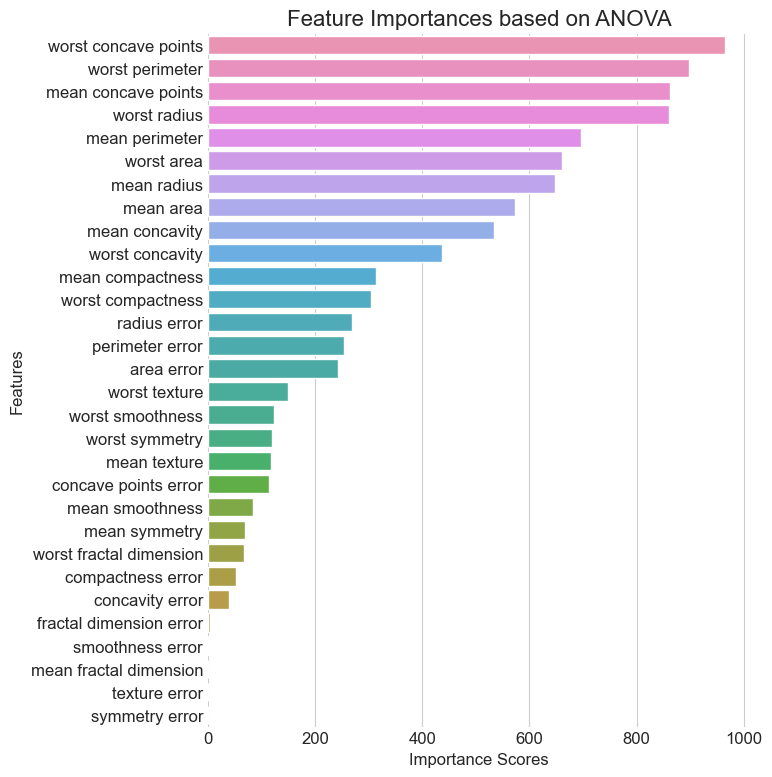

Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'perimeter error', 'area error', 'compactness error', 'concavity error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,perimeter error,area error,compactness error,concavity error,concave points error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,0.319892,0.277308,0.306337,0.187275,0.242033,0.136127,0.067502,0.066054,0.208586,0.050154,0.038449,0.027396,0.102653,0.044949,0.110400,0.263607,0.278252,0.232980,0.132889,0.171300,0.150488,0.124920,0.206838,0.154741,0.099042
124,0.302381,0.225905,0.292378,0.173913,0.167193,0.165235,0.189597,0.139165,0.182828,0.018975,0.021957,0.014677,0.228678,0.125177,0.196628,0.225187,0.285981,0.207082,0.109836,0.206894,0.219082,0.264217,0.308522,0.095210,0.139315
421,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.157414,0.190265,0.079657,0.376934,0.133283,0.299299,0.303451,0.168443,0.317197,0.153362,0.396421,0.326193,0.257109,0.380756,0.248768,0.242949
195,0.280610,0.223876,0.267708,0.158176,0.241762,0.105147,0.090745,0.118141,0.388384,0.029947,0.034679,0.016713,0.102277,0.058611,0.159500,0.211668,0.265991,0.201205,0.102094,0.254441,0.119636,0.140895,0.282990,0.287601,0.094779
545,0.314213,0.457220,0.299910,0.182269,0.359574,0.147506,0.069681,0.121421,0.305051,0.084918,0.061678,0.045645,0.140731,0.051035,0.171699,0.263963,0.454957,0.234922,0.133848,0.333025,0.120703,0.083786,0.246529,0.212300,0.095041


In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply ANOVA F-test feature selection to select the top two features
selector = SelectKBest(f_classif, k=n_features)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
mask = selector.get_support()

# Make dataframe with new features
X_train_anova = X_train.loc[:,mask]
X_test_anova = X_test.loc[:,mask]
new_features = X_train.loc[:,mask].columns.tolist()

# Get the feature importances and plot
scores = selector.scores_
feature_importances = {feature_name: score for feature_name, score in zip(X_train.columns, scores)}
feature_importances = pd.DataFrame(feature_importances.items(), columns=['Feature', 'Importance'])\
    .sort_values('Importance', ascending=True)
plot_importances(feature_importances, 'Feature Importances based on ANOVA')

print("Selected features:", new_features)

X_train_anova.head()

### Test linear regression using selscted features

In [16]:
print("\nBase Model:")
reg = fit_model(X_train, y_train, X_test, y_test)

print("\nFeature selection by Pearson Correlation:")
reg = fit_model(X_train_corr, y_train, X_test_corr, y_test)

print("\nFeature selection by Chi-squared:")
reg = fit_model(X_train_chi, y_train, X_test_chi, y_test)

print("\nFeature selection by ANOVA:")
reg = fit_model(X_train_anova, y_train, X_test_anova, y_test)


Base Model:
Precision: 0.971 Recall: 0.935 F1-score: 0.953

Feature selection by Pearson Correlation:
Precision: 0.981 Recall: 0.944 F1-score: 0.962

Feature selection by Chi-squared:
Precision: 0.981 Recall: 0.944 F1-score: 0.962

Feature selection by ANOVA:
Precision: 0.981 Recall: 0.944 F1-score: 0.962


# 2. Wrapper methods

## Recursive feature elimination (RFE)

Selected features:
Index(['mean concave points', 'concave points error', 'worst radius',
       'worst texture', 'worst area'],
      dtype='object')


C:\Users\hjurz\AppData\Local\Temp\ipykernel_26360\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


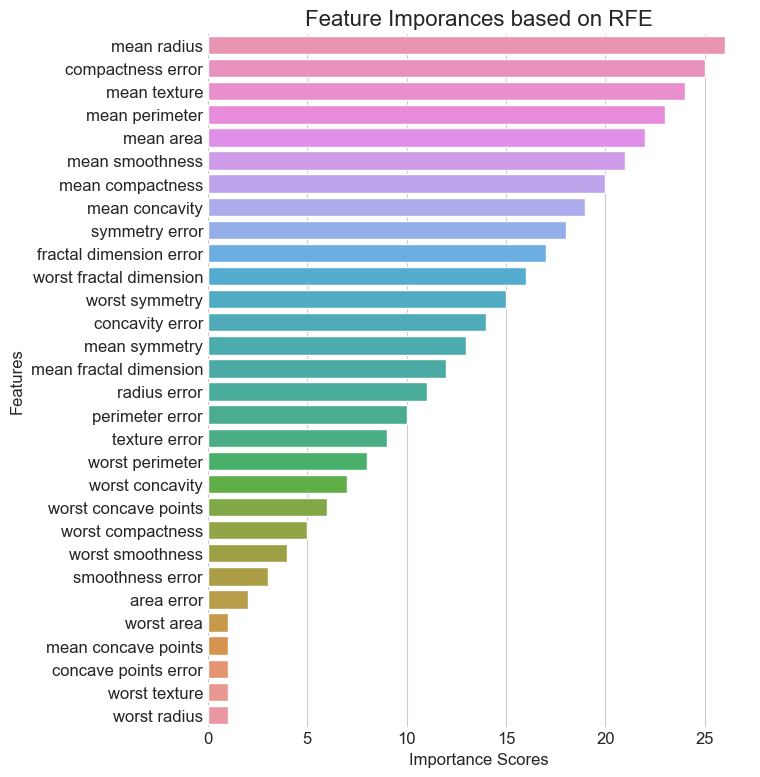

,mean concave points,concave points error,worst radius,worst texture,worst area
149,0.066054,0.110400,0.263607,0.278252,0.132889
124,0.139165,0.196628,0.225187,0.285981,0.109836
421,0.313121,0.299299,0.303451,0.168443,0.153362
195,0.118141,0.159500,0.211668,0.265991,0.102094
545,0.121421,0.171699,0.263963,0.454957,0.133848
...,...,...,...,...,...
71,0.142744,0.334533,0.064141,0.097281,0.024381
106,0.173211,0.264823,0.185343,0.459488,0.082703
270,0.031064,0.068346,0.248310,0.230011,0.122739
435,0.321223,0.181228,0.324084,0.500533,0.168133


In [17]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a model object 
model = DecisionTreeClassifier(max_depth=n_features)


# Create a Recursive Feature Elimination object
rfe = RFE(estimator=model, n_features_to_select=5, step=1)

# Fit the RFE object to the data
rfe.fit(X_train, y_train.values.ravel())

# Filter the dataset for the selected features
X_train_rfe = X_train.iloc[:,rfe.support_]
X_test_rfe = X_test.iloc[:,rfe.support_]
selected_features = X_train_rfe.columns

# Print the selected features
print('Selected features:')
print(selected_features)

# Get the feature importances and plot
df_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfe.ranking_})
df_importance = df_importance.sort_values(by='Importance', ascending=True)
plot_importances(df_importance, 'Feature Imporances based on RFE')

# Show the filtered dataset
X_train_rfe

## Sequential feature selection (SFS)

In [18]:
from sklearn.feature_selection import SequentialFeatureSelector

# Create a model object 
model = DecisionTreeClassifier(max_depth=n_features)

# Create a Sequential Feature Selector object
sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=5, direction='forward')

# Fit the Sequential Feature Selector object to the data
sfs.fit(X_train, y_train.values.ravel())

# Filter the dataset for the selected features
X_train_sfs = X_train.iloc[:,sfs.support_]
X_test_sfs = X_test.iloc[:,sfs.support_]
selected_features = X_train_sfs.columns.tolist()

# Print the selected features
print('Selected features:')
print(selected_features)

# Show the filtered dataset
X_train_sfs

Selected features:
['mean concavity', 'mean concave points', 'worst radius', 'worst texture', 'worst perimeter']


,mean concavity,mean concave points,worst radius,worst texture,worst perimeter
149,0.067502,0.066054,0.263607,0.278252,0.232980
124,0.189597,0.139165,0.225187,0.285981,0.207082
421,0.339738,0.313121,0.303451,0.168443,0.317197
195,0.090745,0.118141,0.211668,0.265991,0.201205
545,0.069681,0.121421,0.263963,0.454957,0.234922
...,...,...,...,...,...
71,0.201640,0.142744,0.064141,0.097281,0.060511
106,0.165651,0.173211,0.185343,0.459488,0.174810
270,0.016987,0.031064,0.248310,0.230011,0.219284
435,0.263824,0.321223,0.324084,0.500533,0.316201


In [19]:
print("\nBase Model:")
reg = fit_model(X_train, y_train, X_test, y_test)

print("\nFeature selection by RFE:")
reg = fit_model(X_train_rfe, y_train, X_test_rfe, y_test)

print("\nFeature selection by SFS:")
reg = fit_model(X_train_sfs, y_train, X_test_sfs, y_test)


Base Model:
Precision: 0.971 Recall: 0.935 F1-score: 0.953

Feature selection by RFE:
Precision: 0.972 Recall: 0.954 F1-score: 0.963

Feature selection by SFS:
Precision: 0.953 Recall: 0.944 F1-score: 0.949


# 3 Embedded methods

In [20]:
from sklearn.metrics import classification_report

def eval_classif(model, X_train, X_test, y_test):
    # Compute predictions on the test set
    y_pred = model.predict(X_test)

    # Print classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

# Decision Tree Feature Importances

Precision: 0.971 Recall: 0.935 F1-score: 0.953


C:\Users\hjurz\AppData\Local\Temp\ipykernel_26360\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


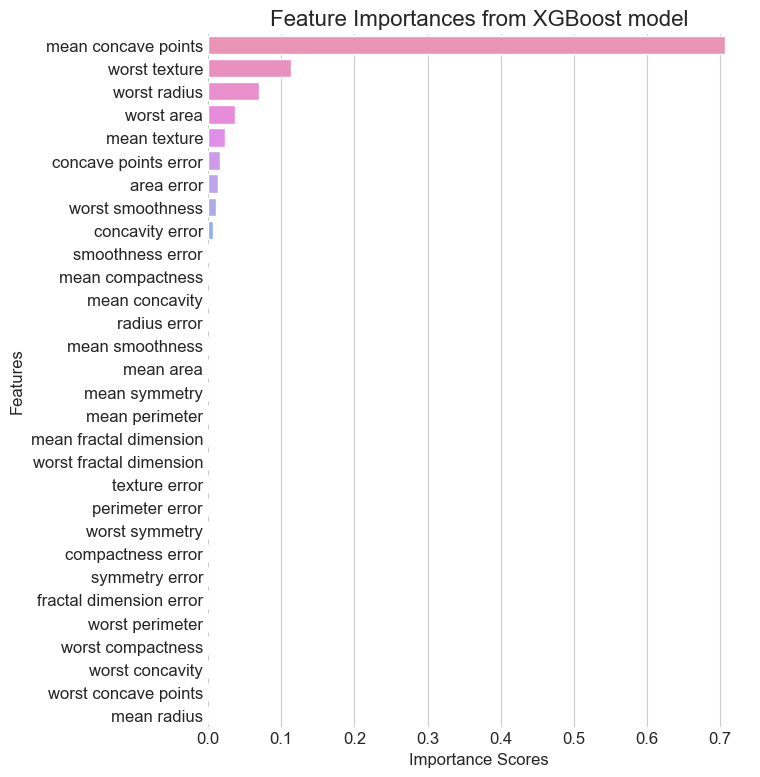

In [21]:
# Initiate model
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print('Precision:', round(precision, 3), 'Recall:', round(recall, 3), 'F1-score:', round(f1, 3))

# Extract the feature importances and create a dataframe
importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': clf.feature_importances_})

# Sort the features by importance
importances = importances.sort_values('Importance', ascending=True)

plot_importances(importances, 'Feature Importances from XGBoost model')


In [22]:
# Select most important features
new_importances = importances[0:n_features]
selected_features = new_importances.Feature.to_list()

print(selected_features)

# Filter X fro selected features
X_train_dt = X_train[selected_features]
X_test_dt = X_test[selected_features]

new_importances

['mean radius', 'worst concave points', 'worst concavity', 'worst compactness', 'worst perimeter', 'fractal dimension error', 'symmetry error', 'compactness error', 'worst symmetry', 'perimeter error', 'texture error', 'worst fractal dimension', 'mean fractal dimension', 'mean perimeter', 'mean symmetry', 'mean area', 'mean smoothness', 'radius error', 'mean concavity', 'mean compactness', 'smoothness error', 'concavity error', 'worst smoothness', 'area error', 'concave points error']


,Feature,Importance
0,mean radius,0.000000
27,worst concave points,0.000000
26,worst concavity,0.000000
25,worst compactness,0.000000
22,worst perimeter,0.000000
19,fractal dimension error,0.000000
18,symmetry error,0.000000
15,compactness error,0.000000
28,worst symmetry,0.000000
12,perimeter error,0.000000


In [23]:
model = fit_model(X_train_dt, y_train, X_test_dt, y_test)

Precision: 0.935 Recall: 0.926 F1-score: 0.93


# Summary

In [24]:
print("\nBase Model:")
model = fit_model(X_train, y_train, X_test, y_test)

print("\nFeature selection by Pearson Correlation:")
model = fit_model(X_train_corr, y_train, X_test_corr, y_test)

print("\nFeature selection by Chi-squared:")
model = fit_model(X_train_chi, y_train, X_test_chi, y_test)

print("\nFeature selection by ANOVA:")
model = fit_model(X_train_anova, y_train, X_test_anova, y_test)

print("\nFeature selection by RFE:")
model = fit_model(X_train_rfe, y_train, X_test_rfe, y_test)

print("\nFeature selection by SFS:")
model = fit_model(X_train_sfs, y_train, X_test_sfs, y_test)

print("\nFeature selection by decision tree feature importances:")
model = fit_model(X_train_dt, y_train, X_test_dt, y_test)


Base Model:
Precision: 0.971 Recall: 0.935 F1-score: 0.953

Feature selection by Pearson Correlation:
Precision: 0.981 Recall: 0.944 F1-score: 0.962

Feature selection by Chi-squared:
Precision: 0.981 Recall: 0.944 F1-score: 0.962

Feature selection by ANOVA:
Precision: 0.981 Recall: 0.944 F1-score: 0.962

Feature selection by RFE:
Precision: 0.972 Recall: 0.954 F1-score: 0.963

Feature selection by SFS:
Precision: 0.953 Recall: 0.944 F1-score: 0.949

Feature selection by decision tree feature importances:
Precision: 0.935 Recall: 0.926 F1-score: 0.93


# Conclusion

In this case, we found that using our filter methods for feature selection led to the best performance. However, it's important to keep in mind that the most effective method will vary depending on your particular dataset and model. So, it's always a good idea to try out a few different feature selection techniques and see which one works best for your specific situation.